In [1]:
#################################################################
##    Marketing analytics                                      ##
##    Exercise in Segmentation                     	           ##
##    Cluster Analysis using US Cities Dataset                 ##
#################################################################

In [2]:

#import dataset

CustomerTransactions<-read.csv('/Users/serdaryetimoglu/Downloads/CustomerTransactions.csv')

In [3]:
#some info's about dataset
head(CustomerTransactions)
summary(CustomerTransactions)
attributes(CustomerTransactions)


ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
1,Adams,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,1,0,0
2,Allen,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
3,Anderson,0,0,0,0,0,0,0,0,⋯,0,1,0,1,0,0,0,0,0,0
4,Bailey,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
5,Baker,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0
6,Barnes,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


       ID         CustomerLastName       X1            X2            X3      
 Min.   :  1.00   Adams   : 1      Min.   :0.0   Min.   :0.0   Min.   :0.00  
 1st Qu.: 25.75   Allen   : 1      1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.00  
 Median : 50.50   Anderson: 1      Median :0.0   Median :0.0   Median :0.00  
 Mean   : 50.50   Bailey  : 1      Mean   :0.1   Mean   :0.1   Mean   :0.06  
 3rd Qu.: 75.25   Baker   : 1      3rd Qu.:0.0   3rd Qu.:0.0   3rd Qu.:0.00  
 Max.   :100.00   Barnes  : 1      Max.   :1.0   Max.   :1.0   Max.   :1.00  
                  (Other) :94                                                
       X4             X5             X6             X7             X8     
 Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.0  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.0  
 Median :0.00   Median :0.00   Median :0.00   Median :0.00   Median :0.0  
 Mean   :0.12   Mean   :0.04   Mean   :0.12   Mean   :0.19   Mean   :0.2  
 

$names
 [1] "ID"               "CustomerLastName" "X1"               "X2"              
 [5] "X3"               "X4"               "X5"               "X6"              
 [9] "X7"               "X8"               "X9"               "X10"             
[13] "X11"              "X12"              "X13"              "X14"             
[17] "X15"              "X16"              "X17"              "X18"             
[21] "X19"              "X20"              "X21"              "X22"             
[25] "X23"              "X24"              "X25"              "X26"             
[29] "X27"              "X28"              "X29"              "X30"             
[33] "X31"              "X32"             

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [4]:
#remove ID and CustomeLastName columns
CustomerTransactions_new<-CustomerTransactions[, -c(1,2)]


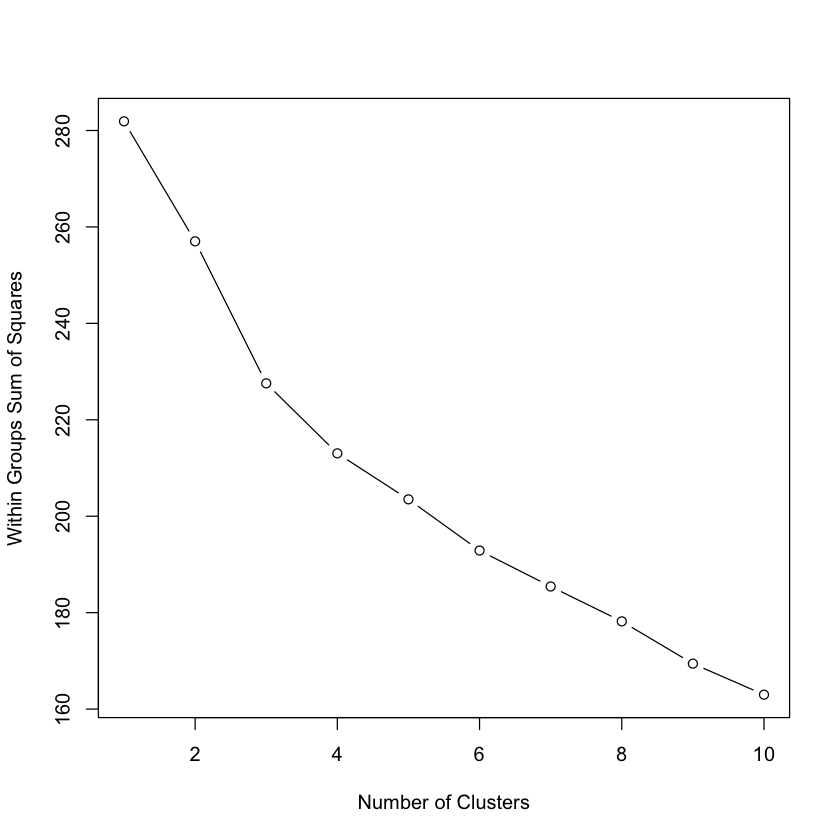

In [5]:
# Elbow Graph

wssplot <- function(CustomerTransactions_new, nc= 15, seed=1234)
{
  wss <- (nrow(CustomerTransactions_new)-1)*sum(apply(CustomerTransactions_new,2,var))
  for (i in 2:nc)
  {
    set.seed(seed)
    wss[i] <- sum(kmeans(CustomerTransactions_new, centers = i)$withinss)
  }
  
  plot(1:nc, wss, type = "b", xlab= "Number of Clusters", ylab = "Within Groups Sum of Squares")
}

wssplot(CustomerTransactions_new, nc=10)

In [6]:
#################################################################
##  K-Means-Partional Clustering                               ##
#################################################################
###            ####
###   Model    ####
###            ####

In [9]:
model <- kmeans(CustomerTransactions_new[-1], 3) # k = 3

In [10]:
summary(model)

             Length Class  Mode   
cluster      100    -none- numeric
centers       93    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [11]:
#Model attributes 
attributes(model) 


$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [12]:
model$withinss
model$cluster


[1] 100.28846  86.83871  47.17647

[1] 1 3 1 1 2 2 1 1 2 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 3 3 2 3 1 1 1 2 2 1 1 2
 [38] 1 2 1 1 1 1 2 1 2 1 1 3 2 2 3 1 1 2 1 1 1 1 2 2 1 2 1 1 3 1 1 2 3 3 3 2 1
 [75] 2 1 1 2 1 1 3 3 3 1 1 1 1 3 3 1 2 1 2 1 3 2 1 3 2 2

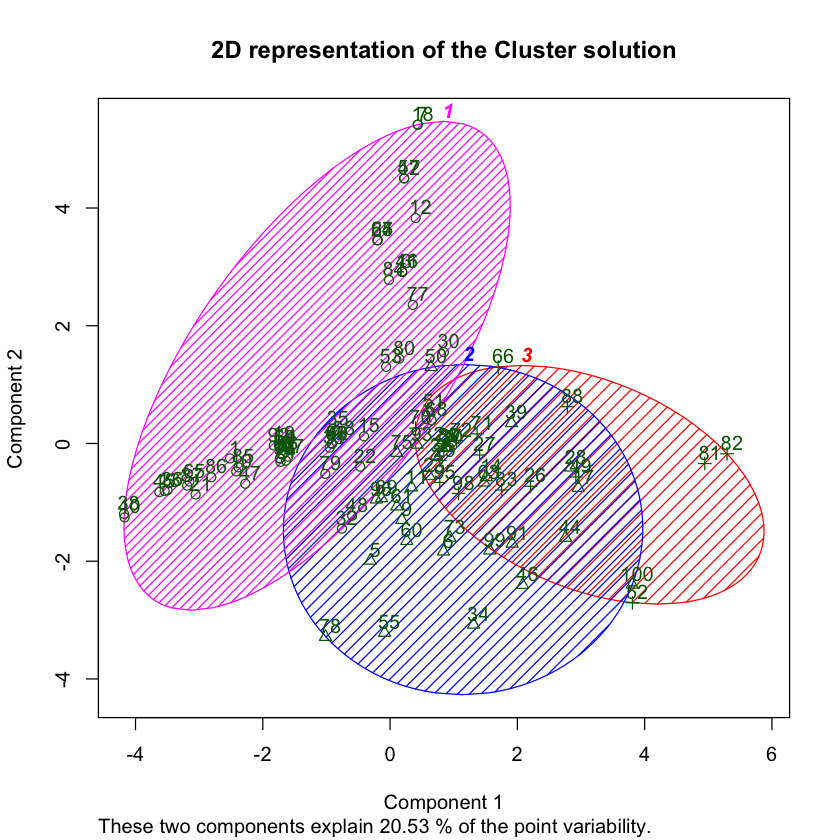

In [13]:
# Plot Clusters in 2D

library(cluster)

clusplot(CustomerTransactions_new[-1], model$cluster, 
         main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)


In [14]:
# Show CustomerTransactions_new and their corresponding clusters:
table(CustomerTransactions_new[,1],model$cluster)

   
     1  2  3
  0 51 27 12
  1  1  4  5

In [15]:
###            ####
###   Model1   ####
###            ####
#Find Hierarchical clustering using Euclidean distance and wards method in matrix.
data_for_CustomerTransactions_new <- dist(CustomerTransactions_new[-1], method = "euclidean") 
model1 <- hclust(data_for_CustomerTransactions_new, method="ward.D")

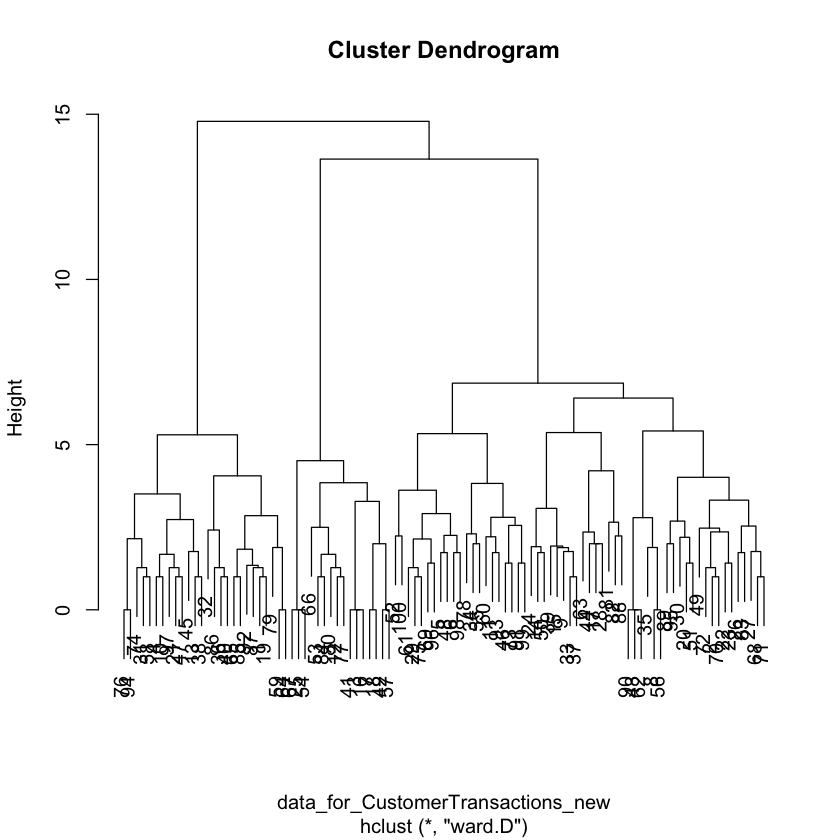

In [16]:
plot(model1)

   groups_for_model1
     1  2  3
  0 26 50 14
  1  0  8  2

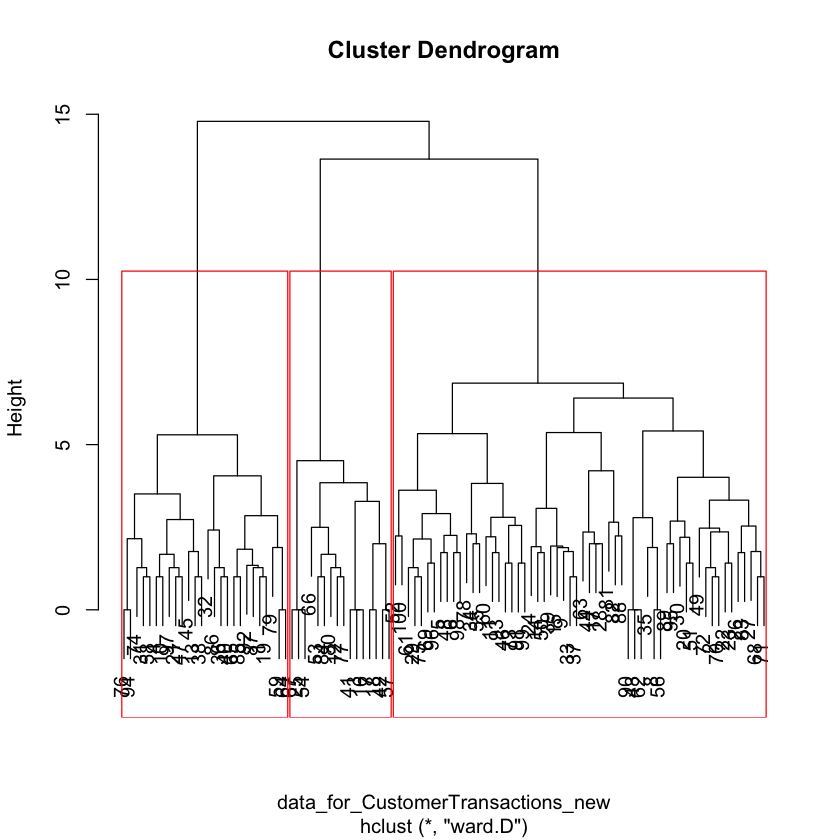

In [22]:
###            ####
###   Model1   ####
###            ####
#Find Hierarchical clustering using Euclidean distance and wards method in matrix.
data_for_CustomerTransactions_new <- dist(CustomerTransactions_new[-1], method = "euclidean") 
model1 <- hclust(data_for_CustomerTransactions_new, method="ward.D")

plot(model1)

# cut tree into 3 clusters
groups_for_model1 <- cutree(model1, k=3)

# show groups
table(CustomerTransactions_new[,1],groups_for_model1)

# draw dendogram with red borders around the 3 clusters
rect.hclust(model1, k=3, border="red") 

   groups_for_model2
     1  2  3
  0 86  3  1
  1  7  1  2

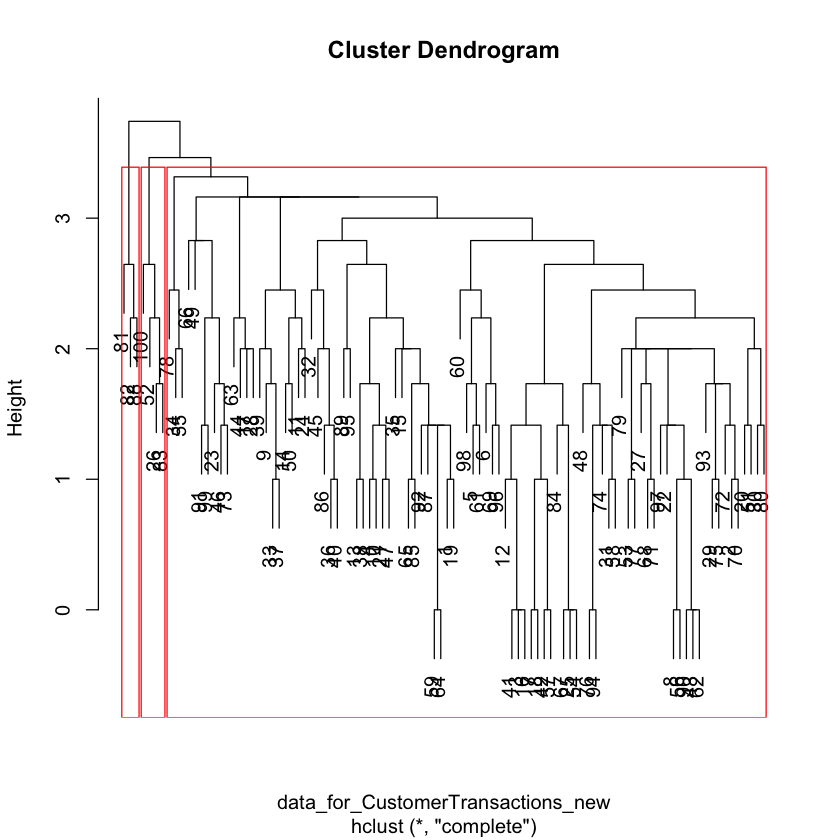

In [23]:
###            ####
###   Model2   ####
###            ####
#Find Hierarchical clustering using Euclidean distance and complete method in matrix.
model2<-hclust(data_for_CustomerTransactions_new, method="complete")
plot(model2)

# cut tree into 3 clusters
groups_for_model2 <- cutree(model2, k=3)

# show groups
table(CustomerTransactions_new[,1],groups_for_model2)

# draw dendogram with red borders around the 3 clusters
rect.hclust(model2, k=3, border="red")